# Problem Sheet 4

## Pre-Amble

In [86]:
import numpy as np
from iminuit import Minuit, cost
from scipy.stats import norm
import matplotlib.pyplot as plt

## Question 1.

In [67]:
g = np.random.default_rng(seed=1)
N = 10000
x = g.normal(0.0, 1.0, N) # Standard deviation 0.25

In [68]:
print("Biased estimate of the variance:", np.var(x))

Biased estimate of the variance: 0.9969943211866304


In [69]:
jackknife_samples = np.zeros((N, N-1))
for i in range(N):
    jackknife_samples[i, :] = np.concatenate([x[:i], x[i+1:]])

In [70]:
jackknife_estimates = np.var(jackknife_samples, axis=1)
jackknife_bias_estimate = (N - 1)*(np.mean(jackknife_estimates) - np.var(x))

In [71]:
jackknife_bias_estimate

-9.970940415227059e-05

In [74]:
np.var(x)

0.9969943211866304

In [72]:
np.var(x) - jackknife_bias_estimate

0.9970940305907827

In [73]:
np.var(x, ddof=1)

0.9970940305896894

## Question 3.

In [90]:
def angle_model_h1(alpha, f):
    return (1-f)*norm.pdf(alpha, 1/(np.pi*np.sqrt(1 - alpha**2)), scale=0.05) + f*norm.pdf(alpha, -1, 0.05)

/tmp/ipykernel_856/3481562197.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return (1-f)*norm.pdf(alpha, 1/(np.pi*np.sqrt(1 - alpha**2)), scale=0.05) + f*norm.pdf(alpha, -1, 0.05)


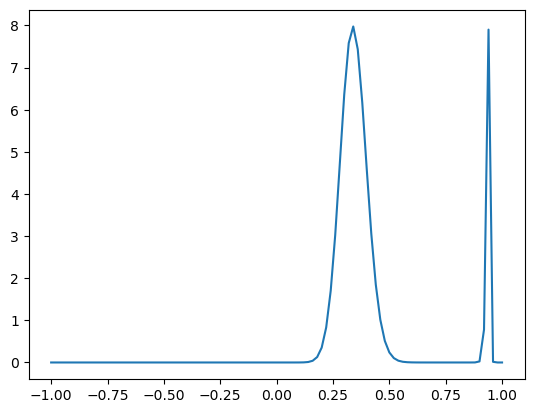

In [92]:
theta_plot = np.linspace(-1,1,101)
angle_model_h1_plot = np.zeros(101)
for i in range(101):
    angle_model_h1_plot[i] = angle_model_h1(theta_plot[i], 0)
plt.plot(theta_plot, angle_model_h1_plot)
plt.show()